In [2]:
%matplotlib inline

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
import skgstat as skg

In [ ]:
# Baca file data (pastikan kolom: x, y, nilai)
df = pd.read_excel('gempasumatra.xlsx')
filtered_df = df[df[" EventLocationName"].str.contains("OFF W COAST OF NORTHERN SUMATRA", case=False, na=False)]
n = len(filtered_df)
print("n: ", n)

# Ambil koordinat dan nilai
coords = filtered_df[[' Longitude ', ' Latitude ']].to_numpy()
vals = filtered_df[[' Magnitude ']].to_numpy()

# make a nice table
pd.DataFrame({'x': coords[:, 0], 'y': coords[:, 1], 'lead': vals.flatten()}).head()

n:  534


,x,y,lead
0,95.5874,2.7899,4.7
1,95.9151,2.9312,4.0
2,95.8569,2.1171,4.4
3,95.6705,3.0677,4.3
4,95.8725,3.2062,3.7


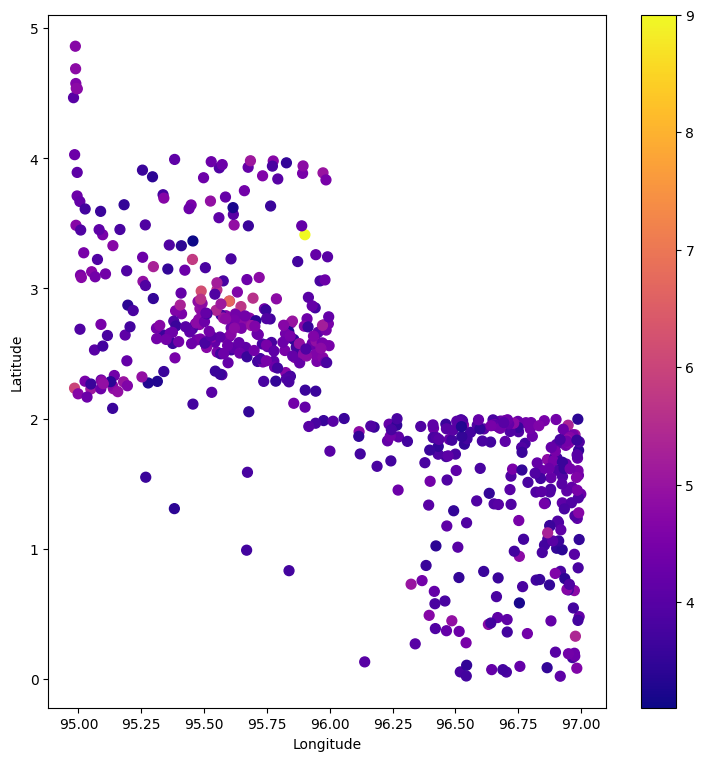

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
art = ax.scatter(coords[:, 0], coords[:, 1], s=50, c=vals.flatten(), cmap='plasma')
plt.colorbar(art)
plt.xlabel('Longitude')
plt.ylabel('Latitude')  
plt.show()

In [48]:
V = skg.Variogram(coords, vals.flatten(), maxlag='median', n_lags=15, normalize=False) 
fig = V.plot(show=False)

In [49]:
print('Sample variance: %.2f   Variogram sill: %.2f' % (vals.flatten().var(), V.describe()['sill']))

Sample variance: 0.30   Variogram sill: 0.30


In [50]:
pprint(V.describe())

{'dist_func': 'euclidean',
 'effective_range': 0.3816350644902968,
 'estimator': 'matheron',
 'kwargs': {},
 'model': 'spherical',
 'normalized_effective_range': 0.4765101742184513,
 'normalized_nugget': 0,
 'normalized_sill': 0.11107928752964019,
 'nugget': 0,
 'params': {'bin_func': 'even',
            'dist_func': 'euclidean',
            'estimator': 'matheron',
            'fit_method': 'trf',
            'fit_sigma': None,
            'maxlag': 1.2486016578556993,
            'model': 'spherical',
            'n_lags': 15,
            'normalize': False,
            'use_nugget': False,
            'verbose': False},
 'sill': 0.296181133552162}


In [51]:
print(V)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   0.38
Sill:              0.30
Nugget:            0.00
        


In [52]:
ok = skg.OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')

In [53]:
# build the target grid
x = coords[:, 0]
y = coords[:, 1]
xx, yy = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

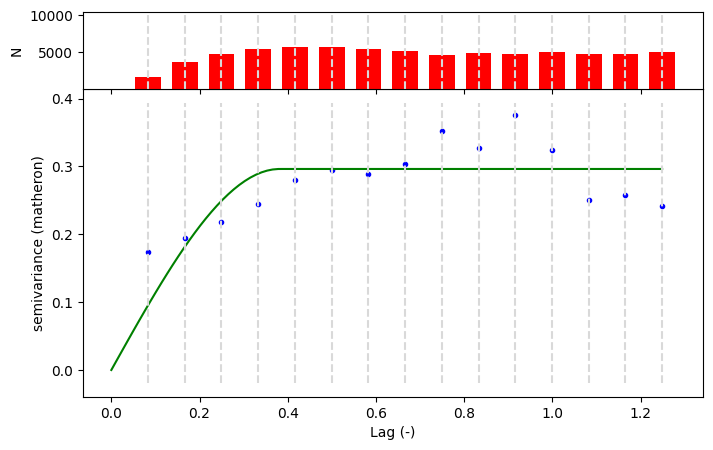

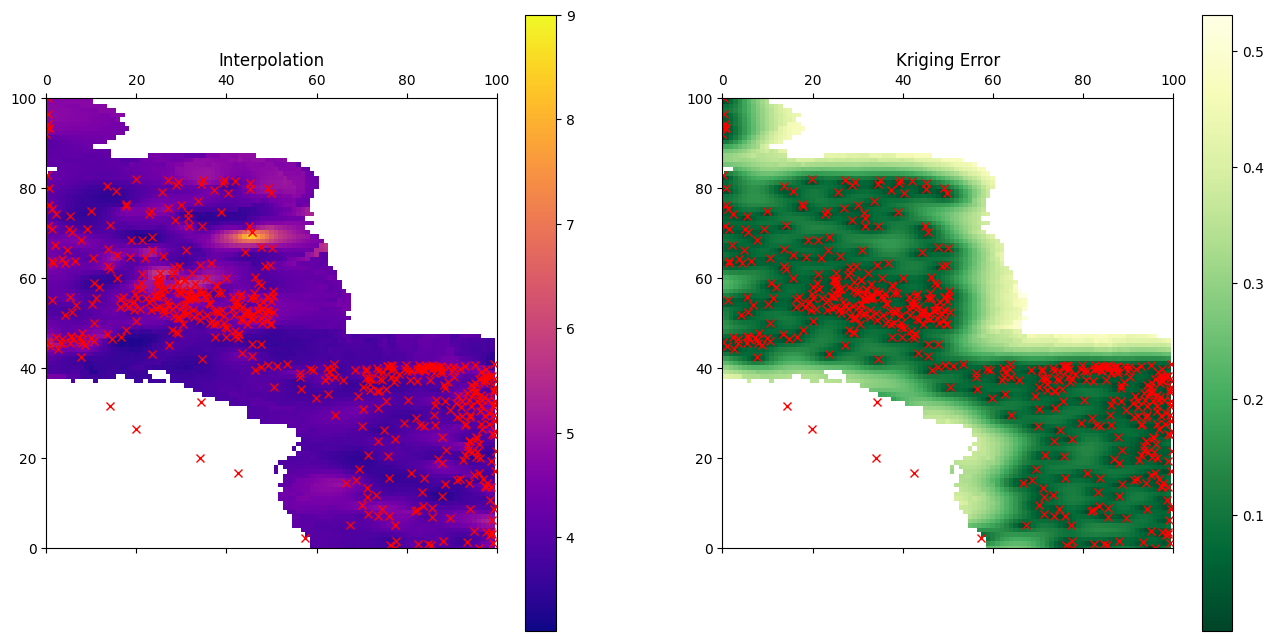

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# rescale the coordinates to fit the interpolation raster
x_ = (x - x.min()) / (x.max() - x.min()) * 100
y_ = (y - y.min()) / (y.max() - y.min()) * 100

art = axes[0].matshow(field.T, origin='lower', cmap='plasma', vmin=vals.min(), vmax=vals.max())
axes[0].set_title('Interpolation')
axes[0].plot(x_, y_, 'xr')
axes[0].set_xlim((0, 100))
axes[0].set_ylim((0, 100))
plt.colorbar(art, ax=axes[0])

art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])
axes[1].plot(x_, y_, 'xr')
axes[1].set_xlim((0, 100))
axes[1].set_ylim((0, 100))

plt.show()